In [44]:
import numpy as np
import pandas as pd

In [45]:
#importing data science subreddit data (submissions and their comments) 
df=pd.read_csv("C:\\Users\pc\Desktop\scraped_data\\scraped_data.csv")
df.set_index(df.columns[0], inplace=True)


In [46]:
df.head()

,title,score,id,num_comments,body,comments
Unnamed: 0,,,,,,
0,Weekly Entering & Transitioning - Thread 03 Ju...,13,14p8a3g,125,Welcome to this week's entering & transitioni...,"[""Hi all,This is my first time posting here an..."
1,Just got hired to a senior level position. I h...,128,14u4pbd,55,I do have experience in the specific field I'm...,"['Is it “senior” as in the title, or “senior” ..."
2,An Introduction to Statistical Learning (ISL) ...,34,14ucbvf,3,The authors of An Introduction to Statistical ...,"['Thanks man!', 'Islr was a great intro to ML...."
3,Open-source contribution in data science,1,14uj4f0,0,I re-encounter this line that contributing to ...,[]
4,Chat GPT plus,1,14ugx2n,4,I've been using Chat GPT to create code snippe...,['Definitely worth it in my opinion. But going...


In [47]:
df.dtypes

title           object
score            int64
id              object
num_comments     int64
body            object
comments        object
dtype: object

### Cleaning the data

In [48]:
import demoji
import re

In [49]:
demoji.download_codes()

C:\Users\pc\AppData\Local\Temp\ipykernel_15148\2299328559.py:1: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [50]:
def remove_emojis(text):
    if isinstance(text, str):
        return demoji.replace(text, '')
    return text


In [51]:
emojiless_df = df[["title", "body", "comments"]].applymap(remove_emojis)

In [52]:
emojiless_df

,title,body,comments
Unnamed: 0,,,
0,Weekly Entering & Transitioning - Thread 03 Ju...,Welcome to this week's entering & transitioni...,"[""Hi all,This is my first time posting here an..."
1,Just got hired to a senior level position. I h...,I do have experience in the specific field I'm...,"['Is it “senior” as in the title, or “senior” ..."
2,An Introduction to Statistical Learning (ISL) ...,The authors of An Introduction to Statistical ...,"['Thanks man!', 'Islr was a great intro to ML...."
3,Open-source contribution in data science,I re-encounter this line that contributing to ...,[]
4,Chat GPT plus,I've been using Chat GPT to create code snippe...,['Definitely worth it in my opinion. But going...
...,...,...,...
904,What is the easiest and way to run MPT 7B mode...,Looking to understand how a production scenari...,['You can check out https://huggingface.co/abh...
905,AB testing pricing formula versioning,Wondering how other teams have managed this. W...,"[""What you're looking to do isn't A/B testing ..."
906,Data Analyst/Scientist UK v US salary comparis...,I’ll start this post by saying I realise you c...,['Higher base salaries for most jobs in the US...


In [53]:
#remove all punctuation
df_cleaned=emojiless_df.replace(r"[^a-zA-Z\s]", "", regex=True)
# Convert all string columns to lowercase
df_cleaned = df_cleaned.apply(lambda x: x.str.lower() if x.dtype == 'object' else x)
df_cleaned

,title,body,comments
Unnamed: 0,,,
0,weekly entering transitioning thread jul ...,welcome to this weeks entering transitioning...,hi allthis is my first time posting here and i...
1,just got hired to a senior level position i ha...,i do have experience in the specific field im ...,is it senior as in the title or senior as in i...
2,an introduction to statistical learning isl w ...,the authors of an introduction to statistical ...,thanks man islr was a great intro to ml i hope...
3,opensource contribution in data science,i reencounter this line that contributing to a...,
4,chat gpt plus,ive been using chat gpt to create code snippet...,definitely worth it in my opinion but going th...
...,...,...,...
904,what is the easiest and way to run mpt b model...,looking to understand how a production scenari...,you can check out httpshuggingfacecoabhinavkul...
905,ab testing pricing formula versioning,wondering how other teams have managed this we...,what youre looking to do isnt ab testing btw s...
906,data analystscientist uk v us salary compariso...,ill start this post by saying i realise you ca...,higher base salaries for most jobs in the us t...


In [54]:
# remove links from title and body of the submissions
df_cleaned['body'] = df_cleaned['body'].apply(lambda x: re.sub(r"http\S+", "", x) if isinstance(x, str) else x)
df_cleaned['title'] = df_cleaned['title'].apply(lambda x: re.sub(r"http\S+", "", x) if isinstance(x, str) else x)


In [55]:
df_cleaned

,title,body,comments
Unnamed: 0,,,
0,weekly entering transitioning thread jul ...,welcome to this weeks entering transitioning...,hi allthis is my first time posting here and i...
1,just got hired to a senior level position i ha...,i do have experience in the specific field im ...,is it senior as in the title or senior as in i...
2,an introduction to statistical learning isl w ...,the authors of an introduction to statistical ...,thanks man islr was a great intro to ml i hope...
3,opensource contribution in data science,i reencounter this line that contributing to a...,
4,chat gpt plus,ive been using chat gpt to create code snippet...,definitely worth it in my opinion but going th...
...,...,...,...
904,what is the easiest and way to run mpt b model...,looking to understand how a production scenari...,you can check out httpshuggingfacecoabhinavkul...
905,ab testing pricing formula versioning,wondering how other teams have managed this we...,what youre looking to do isnt ab testing btw s...
906,data analystscientist uk v us salary compariso...,ill start this post by saying i realise you ca...,higher base salaries for most jobs in the us t...


In [56]:
#final cleaned df - stop words and tokenization will be handled later on by countvectorizer
data= pd.concat([df_cleaned, df[['score', 'num_comments']]], axis=1)
# droping submissions that don't have a textual body
data.dropna(axis=0,inplace=True)
data

,title,body,comments,score,num_comments
Unnamed: 0,,,,,
0,weekly entering transitioning thread jul ...,welcome to this weeks entering transitioning...,hi allthis is my first time posting here and i...,13,125
1,just got hired to a senior level position i ha...,i do have experience in the specific field im ...,is it senior as in the title or senior as in i...,128,55
2,an introduction to statistical learning isl w ...,the authors of an introduction to statistical ...,thanks man islr was a great intro to ml i hope...,34,3
3,opensource contribution in data science,i reencounter this line that contributing to a...,,1,0
4,chat gpt plus,ive been using chat gpt to create code snippet...,definitely worth it in my opinion but going th...,1,4
...,...,...,...,...,...
903,what are your favorite resources for time seri...,i have not worked with time series data since ...,httpswwwredditcomrdatasciencecommentsgkieiwant...,0,2
904,what is the easiest and way to run mpt b model...,looking to understand how a production scenari...,you can check out httpshuggingfacecoabhinavkul...,5,1
905,ab testing pricing formula versioning,wondering how other teams have managed this we...,what youre looking to do isnt ab testing btw s...,6,12


### Data Analysis and Exploration

In [57]:
data.sort_values('score', inplace=True, ascending=False)
data.head()

,title,body,comments,score,num_comments
Unnamed: 0,,,,,
143,a small rant the quality of data analysts sc...,i work for a mid size company as a manager and...,hilarious although i find scatter plots quite...,669,608
501,is rdatascience going private from june to pr...,for those who arent aware of whats happening ...,members of this sub should understand the rati...,627,129
416,i dont want to be a data scientist anymore,wanted to thank everyone for taking the time t...,i am a phd student and years old feeling exac...,442,225
181,why is there no interest in business analytics,my job title is analytics manager and i work f...,in ba you have to deal with nontechnical acto...,418,248
604,what are the brutal truths about working in da...,what are the brutal truths about working in da...,many companies dont actually want to be data d...,352,328


### Sentiment Analysis

In [58]:
import nltk
import spacy
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
vectorizer = CountVectorizer(stop_words='english')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [60]:
data['combined_text'] = data['title'] + ' ' + data['body']
X=data['combined_text']
#X.fillna('', inplace=True)
#matrix with word frequencies
X_c = vectorizer.fit_transform(X)
# Get the feature names (vocabulary) from CountVectorizer
feature_names = vectorizer.get_feature_names_out()
#number of words in the vocabulary
print(feature_names.shape)
word_counts = X_c.toarray().sum(axis=0)
# Create a dictionary of word frequencies
word_freq_dict = dict(zip(feature_names, word_counts))
#word_freq_dict

(9841,)


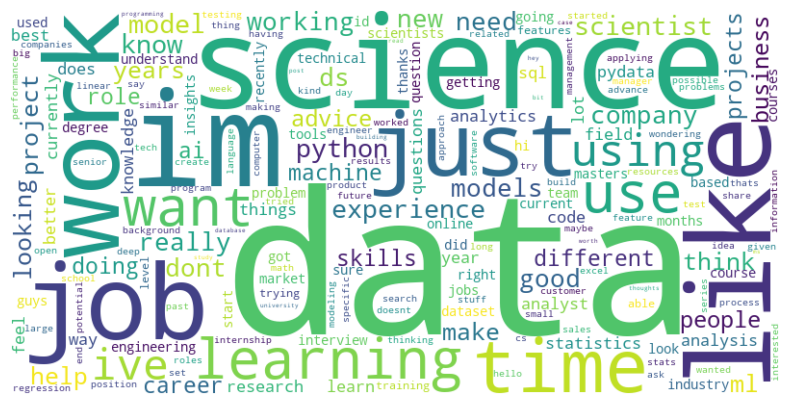

In [61]:
wordcloud = WordCloud(width=800, height=400, background_color="white")

# Generate the word cloud from the word frequency dictionary
wordcloud.generate_from_frequencies(word_freq_dict)

# Display the word cloud 
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [62]:
#clssifying words by sentiment
def classify_words(word_frequencies):
    sia = SentimentIntensityAnalyzer()
    positive_words = []
    negative_words = []
    neutral_words = []

    for word in word_frequencies:
        score = sia.polarity_scores(word)['compound']
        if score >= 0.5:
            positive_words.append(word)
        elif score <= -0.5:
            negative_words.append(word)
        else:
            neutral_words.append(word)

    return positive_words, negative_words, neutral_words


# Assuming you have a list of words called 'word_frequencies'

positive_words, negative_words, neutral_words = classify_words(word_freq_dict)

print("Positive words:", positive_words)
print("Negative words:", negative_words)
print("Neutral_words:", neutral_words)

Positive words: ['amazing', 'appreciated', 'appreciation', 'awesome', 'beautiful', 'best', 'bonus', 'bonuses', 'brilliant', 'brilliantly', 'comfortable', 'confidence', 'delightful', 'encourage', 'enjoyed', 'enjoying', 'ethical', 'excels', 'fantastic', 'fascinating', 'free', 'freedom', 'fun', 'gain', 'glorified', 'gracious', 'great', 'happier', 'happiness', 'happy', 'honest', 'honors', 'hopeful', 'ideal', 'impressing', 'impressive', 'inspiration', 'inspire', 'intellectual', 'joy', 'justice', 'kind', 'laugh', 'love', 'loved', 'lovely', 'loyalty', 'passionate', 'perfect', 'perfection', 'pleasant', 'positive', 'positively', 'precious', 'remarkable', 'rewarding', 'rich', 'sophisticated', 'strong', 'success', 'successful', 'super', 'supremely', 'thankful', 'tia', 'trust', 'trustworthy', 'win', 'winning', 'wisdom', 'won', 'wonderful', 'wow']
Negative words: ['abuse', 'angry', 'ass', 'bad', 'bastard', 'brutal', 'bullshit', 'chaos', 'crime', 'curse', 'dead', 'death', 'degrading', 'destroying', 

In [63]:
positive_word_freq = {}

# create frequency dictionary for positive words
for word, freq in word_freq_dict.items():
    if word in positive_words:
        positive_word_freq[word] = freq

negative_word_freq = {}

# create frequency dictionary for negative words
for word, freq in word_freq_dict.items():
    if word in negative_words:
        negative_word_freq[word] = freq

neutral_word_freq = {}

# create frequency dictionary for neutral words
for word, freq in word_freq_dict.items():
    if word in neutral_words:
        neutral_word_freq[word] = freq

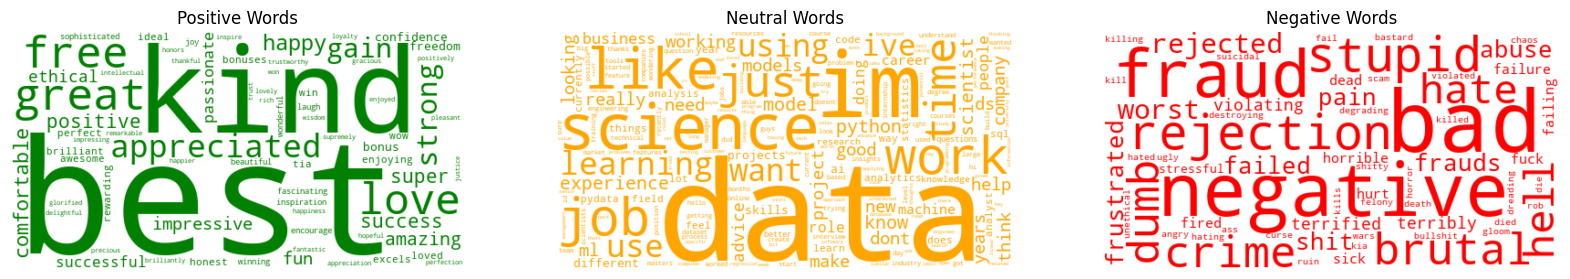

In [64]:
# Create the positive word cloud
positive_wordcloud = WordCloud(width=500, height=260, background_color='white', color_func=lambda *args, **kwargs: 'green')
positive_wordcloud.generate_from_frequencies(positive_word_freq)

# Create the neutral word cloud
neutral_wordcloud = WordCloud(width=500, height=260, background_color='white', color_func=lambda *args, **kwargs: 'orange')
neutral_wordcloud.generate_from_frequencies(neutral_word_freq)

# Create the negative word cloud
negative_wordcloud = WordCloud(width=500, height=260, background_color='white', color_func=lambda *args, **kwargs: 'red')
negative_wordcloud.generate_from_frequencies(negative_word_freq)

# Create a figure with a 2x2 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

# Display the positive word cloud
axs[0].imshow(positive_wordcloud, interpolation="bilinear")
axs[0].axis("off")
axs[0].set_title("Positive Words")

# Display the neutral word cloud
axs[1].imshow(neutral_wordcloud, interpolation="bilinear")
axs[1].axis("off")
axs[1].set_title("Neutral Words")

# Display the negative word cloud
axs[2].imshow(negative_wordcloud, interpolation="bilinear")
axs[2].axis("off")
axs[2].set_title("Negative Words")

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.2)

# Display the figure
plt.show()

In [65]:
#same process for submissions having positive neutral and negative overall sentiment


In [66]:
#todo display the words(neutral) associated with positive sentiment and the ones associated with negative sentiment

In [67]:
documents=X
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [68]:
def polarity(text):
    pol = analyzer.polarity_scores(text)
    return pol

data['polarity'] = data['combined_text'].apply(polarity)  #polarity checking
data['compound']  = data['polarity'].apply(lambda score_dict: score_dict['compound'])

data['sentiment'] = data['compound'].apply(lambda x: "Positive" if x>0 else("Negative" if x<0 else "Neutral") )
print("polarity checked successfull")

polarity checked successfull


In [69]:
data.head()

,title,body,comments,score,num_comments,combined_text,polarity,compound,sentiment
Unnamed: 0,,,,,,,,,
143,a small rant the quality of data analysts sc...,i work for a mid size company as a manager and...,hilarious although i find scatter plots quite...,669,608,a small rant the quality of data analysts sc...,"{'neg': 0.071, 'neu': 0.782, 'pos': 0.148, 'co...",0.9873,Positive
501,is rdatascience going private from june to pr...,for those who arent aware of whats happening ...,members of this sub should understand the rati...,627,129,is rdatascience going private from june to pr...,"{'neg': 0.061, 'neu': 0.794, 'pos': 0.145, 'co...",0.7430,Positive
416,i dont want to be a data scientist anymore,wanted to thank everyone for taking the time t...,i am a phd student and years old feeling exac...,442,225,i dont want to be a data scientist anymore wan...,"{'neg': 0.026, 'neu': 0.833, 'pos': 0.141, 'co...",0.9951,Positive
181,why is there no interest in business analytics,my job title is analytics manager and i work f...,in ba you have to deal with nontechnical acto...,418,248,why is there no interest in business analytics...,"{'neg': 0.028, 'neu': 0.851, 'pos': 0.122, 'co...",0.9825,Positive
604,what are the brutal truths about working in da...,what are the brutal truths about working in da...,many companies dont actually want to be data d...,352,328,what are the brutal truths about working in da...,"{'neg': 0.258, 'neu': 0.566, 'pos': 0.176, 'co...",-0.5574,Negative


In [70]:
X_ = data[data['sentiment'] == 'Positive'].copy()
X_neu_submission = data[data['sentiment'] == 'Neutral'].copy()
X_neg_submission = data[data['sentiment'] == 'Negative'].copy()

In [71]:
#X_neu_submission

In [72]:
#creating word cloud for positive words
X_pos=X_['combined_text']
#X.fillna('', inplace=True)
#matrix with word frequencies
X_c = vectorizer.fit_transform(X_pos)
# Get the feature names (vocabulary) from CountVectorizer
feature_names_pos = vectorizer.get_feature_names_out()
#number of words in the vocabulary
print(feature_names_pos.shape)
word_counts_pos = X_c.toarray().sum(axis=0)
# Create a dictionary of word frequencies
word_freq_dict_pos = dict(zip(feature_names_pos, word_counts_pos))
#word_freq_dict

(8953,)


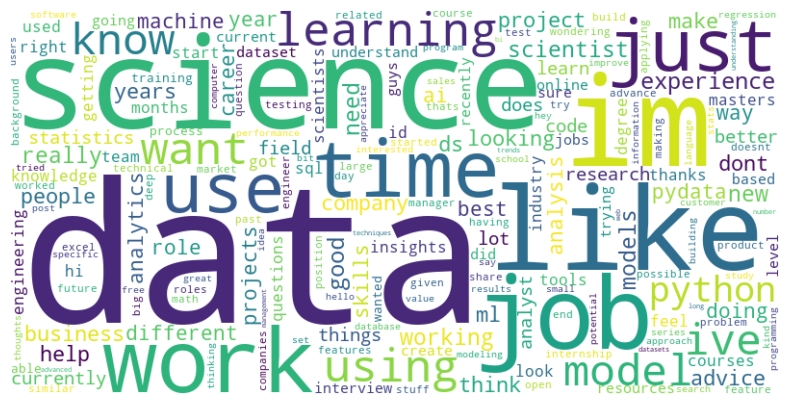

In [73]:
wordcloud = WordCloud(width=800, height=400, background_color="white")

# Generate the word cloud from the word frequency dictionary
wordcloud.generate_from_frequencies(word_freq_dict_pos)

# Display the word cloud 
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [74]:
#creating word cloud for negative words
X_neg=X_neg_submission['combined_text']
#X.fillna('', inplace=True)
#matrix with word frequencies
X_c = vectorizer.fit_transform(X_neg)
# Get the feature names (vocabulary) from CountVectorizer
feature_names_neg = vectorizer.get_feature_names_out()
#number of words in the vocabulary
print(feature_names_neg.shape)
word_counts_neg = X_c.toarray().sum(axis=0)
# Create a dictionary of word frequencies
word_freq_dict_neg = dict(zip(feature_names_neg, word_counts_neg))
#word_freq_dict

(2500,)


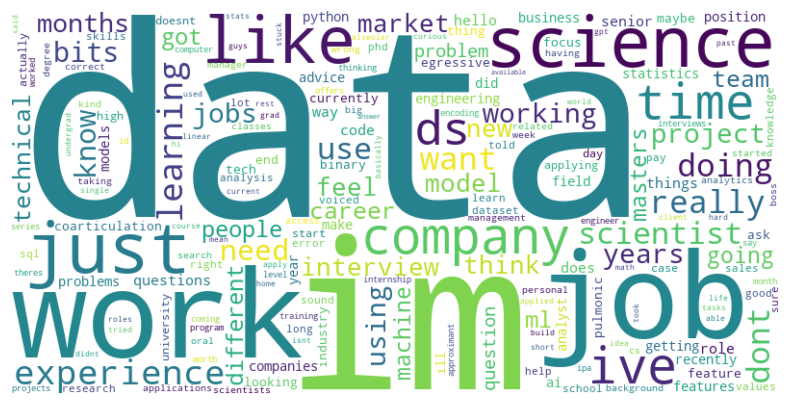

In [75]:
wordcloud = WordCloud(width=800, height=400, background_color="white")

# Generate the word cloud from the word frequency dictionary
wordcloud.generate_from_frequencies(word_freq_dict_neg)

# Display the word cloud 
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [76]:
#pd.set_option('display.max_colwidth',None)
pd.reset_option('display.max_colwidth')

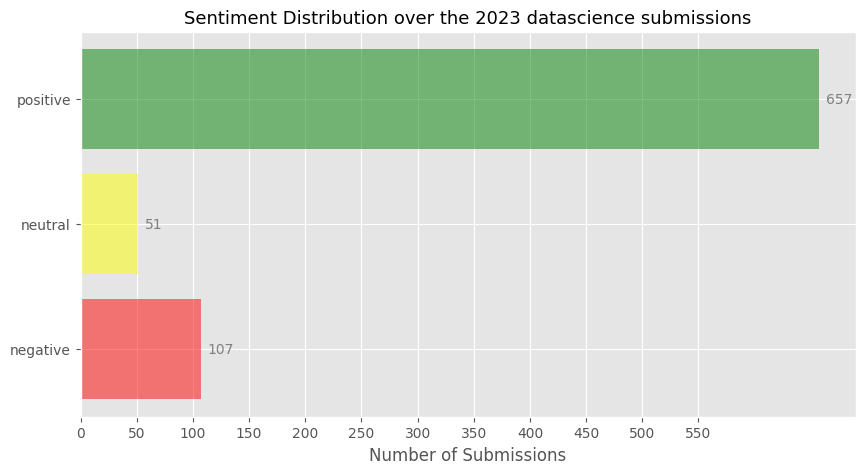

In [82]:
plt.style.use("ggplot")

positive = len(data[data.sentiment == "Positive"])
negative = len(data[data.sentiment == "Negative"])
neutral = len(data[data.sentiment == "Neutral"])

sentiment = [positive, neutral, negative]
sentiment_cat = ["positive", "neutral", "negative"]

sentiment.reverse()
sentiment_cat.reverse()

fig, ax = plt.subplots(figsize=(10,5))

palette = ["red", "yellow", "green"]

hbars = plt.barh(sentiment_cat, sentiment, color = palette, alpha = 0.5)

ax.bar_label(hbars, fmt='%.0f', color = "grey", padding = 5)

plt.xticks(np.arange(0,560,50).tolist())

plt.xlabel("Number of Submissions")
plt.title("Sentiment Distribution over the 2023 datascience submissions", size = 13)
plt.show()

In [77]:

#topic analysis
nlp = spacy.load('en_core_web_sm')
#Getting TOPIC keyword from text
def token(text):
    removal=['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE']  #get Noun phrase
    tok = []
    doc= nlp(text)
    for token in doc:
        if token.is_stop == False and token.is_alpha and len(token)>2 and token.pos_ not in removal:
            lemma = token.lemma_            #lemmatization of token word
            tok.append(lemma)
            
    return tok

data['token'] = data['combined_text'].apply(token)
data.head()

,title,body,comments,score,num_comments,combined_text,polarity,compound,sentiment,token
Unnamed: 0,,,,,,,,,,
143,a small rant the quality of data analysts sc...,i work for a mid size company as a manager and...,hilarious although i find scatter plots quite...,669,608,a small rant the quality of data analysts sc...,"{'neg': 0.071, 'neu': 0.782, 'pos': 0.148, 'co...",0.9873,Positive,"[small, rant, quality, datum, analyst, scienti..."
501,is rdatascience going private from june to pr...,for those who arent aware of whats happening ...,members of this sub should understand the rati...,627,129,is rdatascience going private from june to pr...,"{'neg': 0.061, 'neu': 0.794, 'pos': 0.145, 'co...",0.7430,Positive,"[rdatascience, go, private, june, protest, red..."
416,i dont want to be a data scientist anymore,wanted to thank everyone for taking the time t...,i am a phd student and years old feeling exac...,442,225,i dont want to be a data scientist anymore wan...,"{'neg': 0.026, 'neu': 0.833, 'pos': 0.141, 'co...",0.9951,Positive,"[want, data, scientist, want, thank, take, tim..."
181,why is there no interest in business analytics,my job title is analytics manager and i work f...,in ba you have to deal with nontechnical acto...,418,248,why is there no interest in business analytics...,"{'neg': 0.028, 'neu': 0.851, 'pos': 0.122, 'co...",0.9825,Positive,"[interest, business, analytic, job, title, ana..."
604,what are the brutal truths about working in da...,what are the brutal truths about working in da...,many companies dont actually want to be data d...,352,328,what are the brutal truths about working in da...,"{'neg': 0.258, 'neu': 0.566, 'pos': 0.176, 'co...",-0.5574,Negative,"[brutal, truth, work, datum, science, brutal, ..."


In [78]:
'''sentiments = []
for document in documents:
    sentiment_scores = analyzer.polarity_scores(document)
    sentiments.append(sentiment_scores)

# Print the sentiment scores for each element in the column
for i, sentiment in enumerate(sentiments):
    print(f"Element {i+1}: {sentiment}")'''

'sentiments = []\nfor document in documents:\n    sentiment_scores = analyzer.polarity_scores(document)\n    sentiments.append(sentiment_scores)\n\n# Print the sentiment scores for each element in the column\nfor i, sentiment in enumerate(sentiments):\n    print(f"Element {i+1}: {sentiment}")'

In [ ]:
#test